In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib

In [2]:
x = np.exp(np.linspace(np.log10(0.001), np.log10(1), 5)) #([0.9, 0.5, 0.2, 0.1])[::-1]
y = x[::-1]

cs = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02', 'grey']

paretocolor = cs[0]
trncolor = cs[1]
tstcolor = cs[0]
shiftcolor = cs[6]

In [3]:
def plot_pareto(fig, x, y, **kwargs):
    sort_idx = np.argsort(x)[::-1]
    new_x = [1] + list(x[sort_idx]) + [x[sort_idx[-1]]]
    new_y = [y[sort_idx[0]]] + list(y[sort_idx]) + [1]
    fig.step(new_x, new_y, where="pre", **kwargs)

def plot_shift(fig, origx, origy, newx, newy, **kwargs):
    for orx, ory, nex, ney in zip(origx, origy, newx, newy):
        fig.quiver(orx, ory, nex-orx, ney-ory, angles="xy", scale_units="xy", scale=1, alpha=0.25, **kwargs)
        #fig.arrow(x=orx, y=ory, dx=nex-orx, dy=ney-ory, zorder=0, head_length=0.09,
        #          width=0.001, length_includes_head=True, **kwargs)

def setup_figure(ox, oy, nx, ny):
    ffig = plt.figure(figsize=[4,4], dpi=300)
    fig = ffig.add_subplot()
    fig.scatter(ox, oy, label="val performance", edgecolor=trncolor, facecolor=trncolor, marker="o")
    plot_pareto(fig, ox, oy, color=trncolor, label="val pareto front", linestyle=":")
    fig.scatter(nx, ny, label="test performance", color=tstcolor, marker="o")
    plot_shift(fig, ox, oy, nx, ny, color=shiftcolor)
    return fig, ffig

def unify_figure(fig, ffig):
    #fig.legend()
    fig.set_ylim([0, 1])
    fig.set_xlim([0, 1])
    fig.set_xlabel("Objective 1", fontsize=14)
    fig.set_ylabel("Objective 2", fontsize=14)
    ax = fig.axes
    ax.tick_params(axis="both", which="major", labelsize=12)
    ffig.tight_layout(pad=0)

def limx(x, l, u):
    x[x > u] = u
    x[x < l] = l
    return x
    

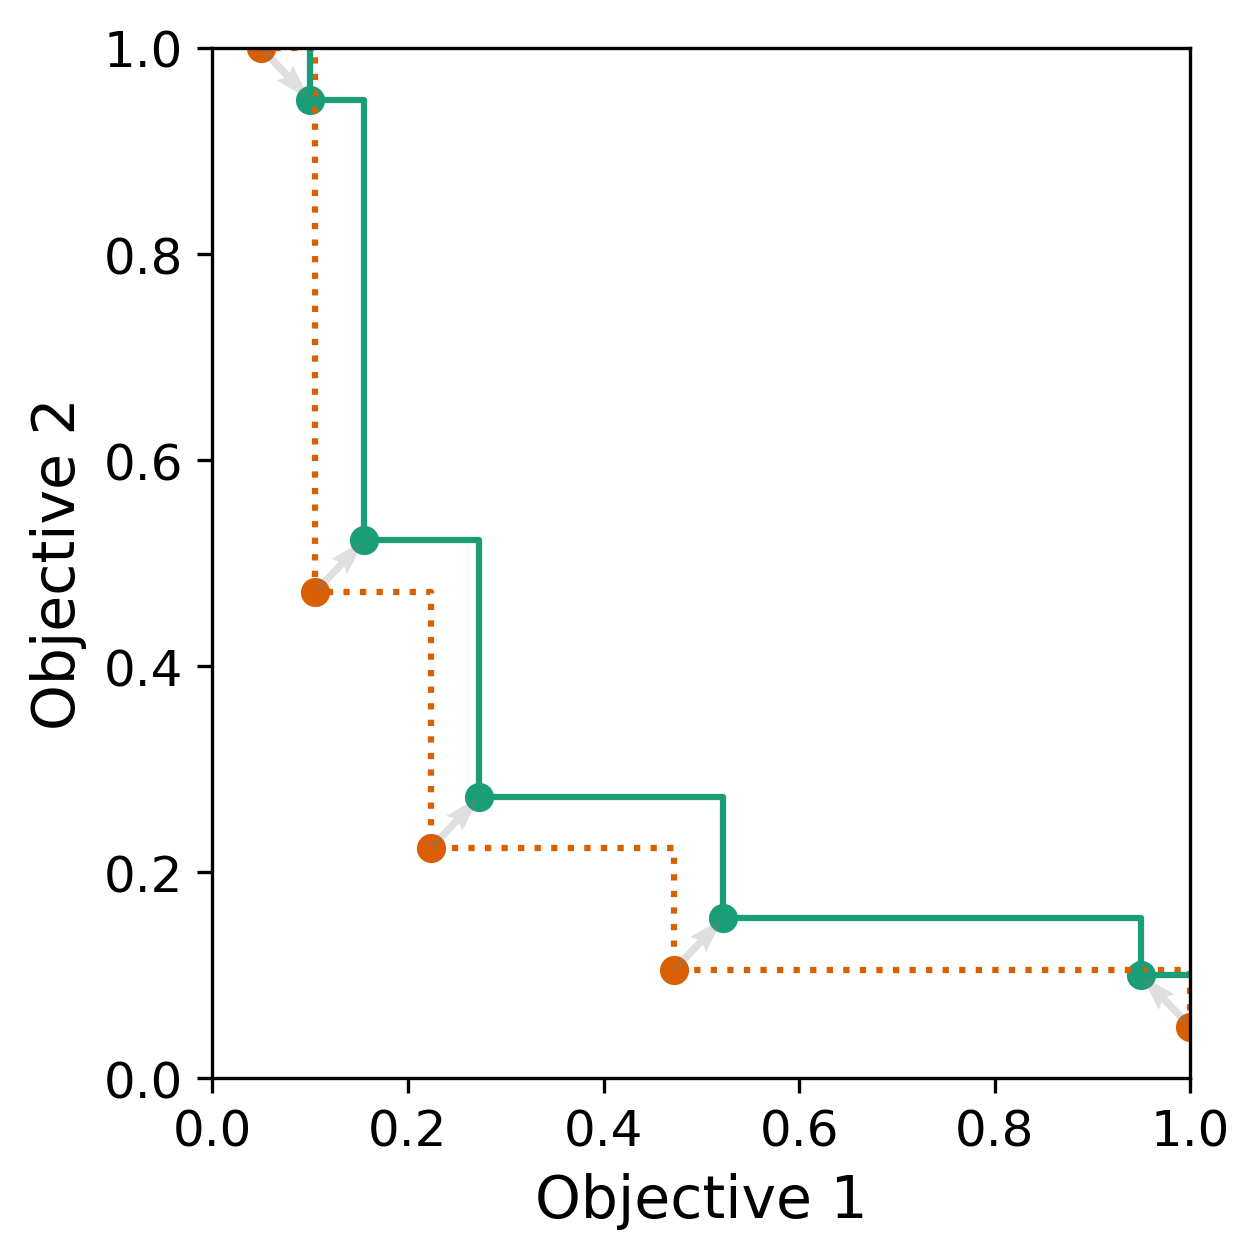

In [4]:
# Ideal plot if everything is fine, all points are slightly worse on test
rng = np.random.RandomState(1)
test_x = x + 0.05
test_y = y + 0.05
test_x = limx(test_x, 0.05, 0.95)
test_y = limx(test_y, 0.05, 0.95)

fig, ffig = setup_figure(ox=x, oy=y, nx=test_x, ny=test_y)

plot_pareto(fig, test_x, test_y, color=paretocolor, label="test pareto front")
unify_figure(fig, ffig)
#tikzplotlib.save("1_ideal.tex")
ffig.savefig("figures/1_ideal.pdf")

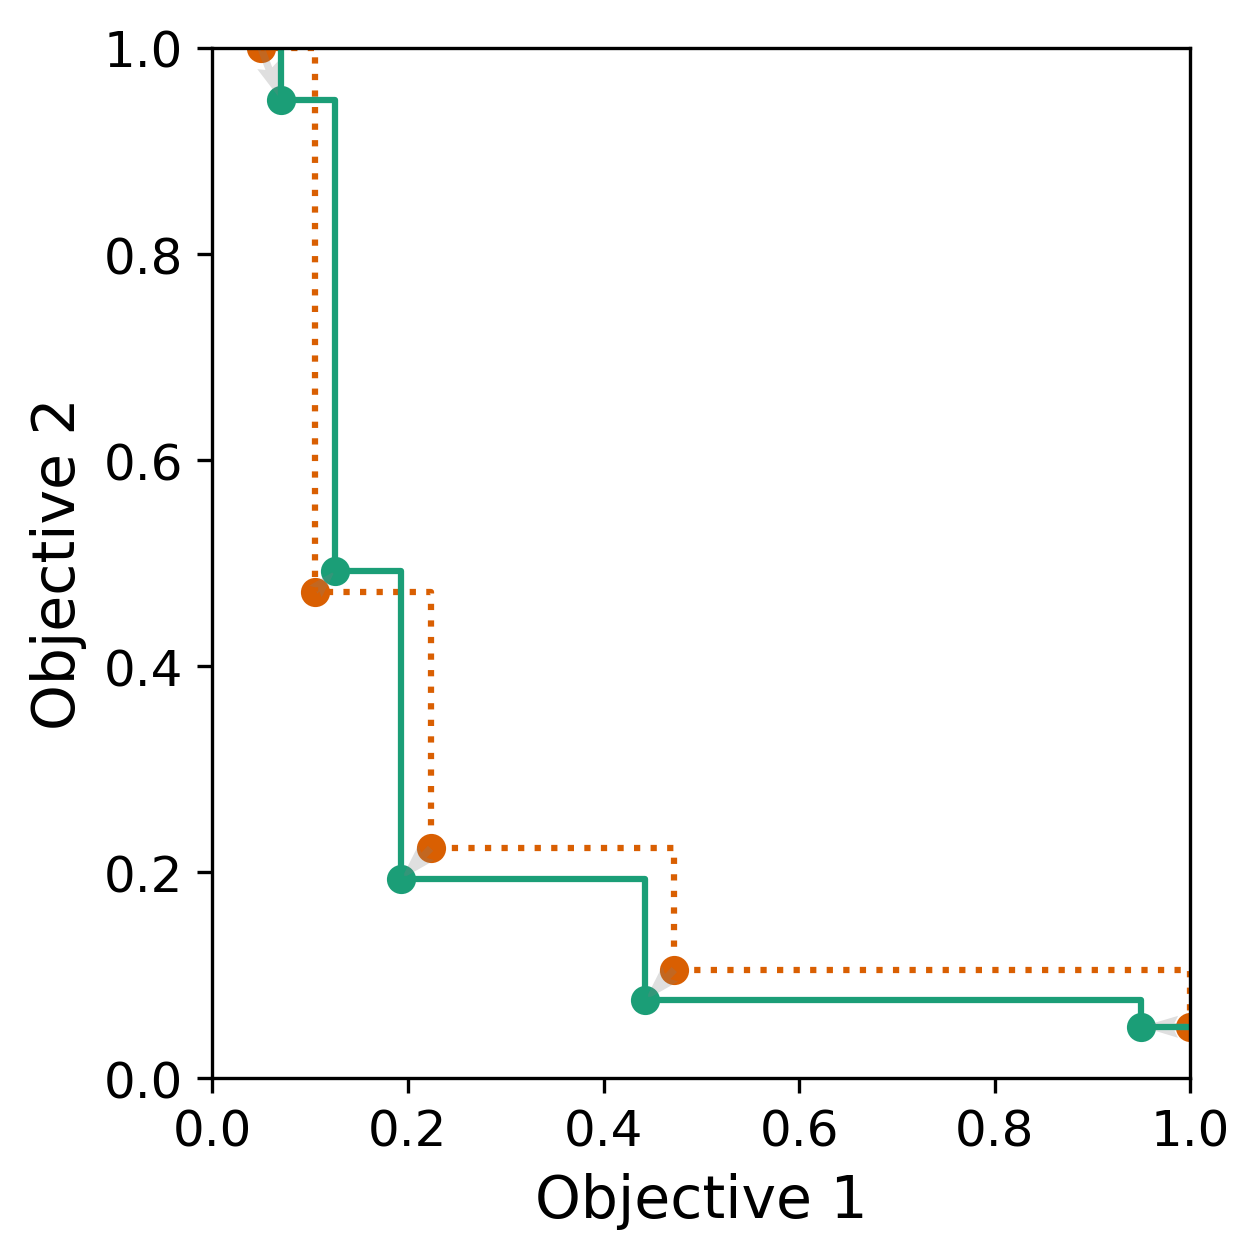

In [5]:
# not a problem, all points perform slightly different, some better, some worse
rng = np.random.RandomState(6)
test_x = x + 0.02
test_y = y + 0.02
test_y[int(test_y.shape[0]/2):] -= 0.05
test_x[int(test_y.shape[0]/2):] -= 0.05
test_x = limx(test_x, 0.05, 0.95)
test_y = limx(test_y, 0.05, 0.95)

fig, ffig = setup_figure(ox=x, oy=y, nx=test_x, ny=test_y)

plot_pareto(fig, test_x, test_y, color=paretocolor, label="test pareto front")
unify_figure(fig, ffig)
#tikzplotlib.save("2_no_problem.tex")
ffig.savefig("figures/2_no_problem.pdf")

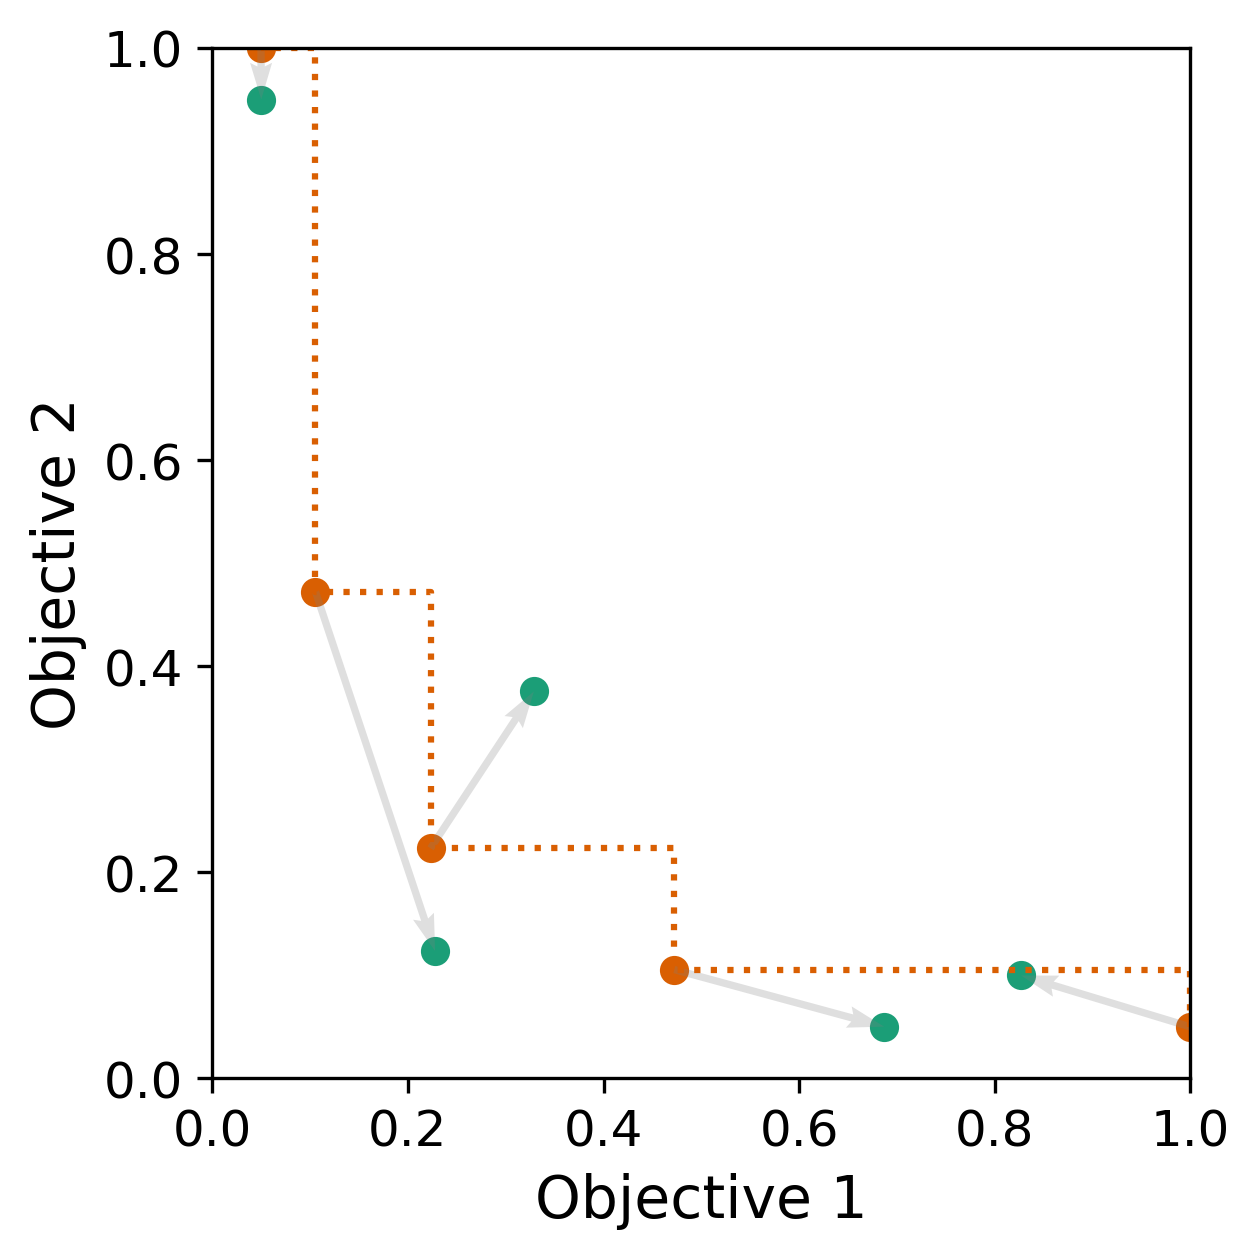

In [6]:
# huge problem, there is no pareto front left
rng = np.random.RandomState(1)
test_x = x - rng.randn(x.shape[0])*0.2
test_y = y - rng.randn(x.shape[0])*0.2
test_x = limx(test_x, 0.05, 0.95)
test_y = limx(test_y, 0.05, 0.95)

fig, ffig = setup_figure(ox=x, oy=y, nx=test_x, ny=test_y)

#fig.step(test_x, test_y, where="post", label="test pareto front", color=paretocolor)
unify_figure(fig, ffig)
#tikzplotlib.save("3_nopareto.tex")
ffig.savefig("figures/3_nopareto.pdf")

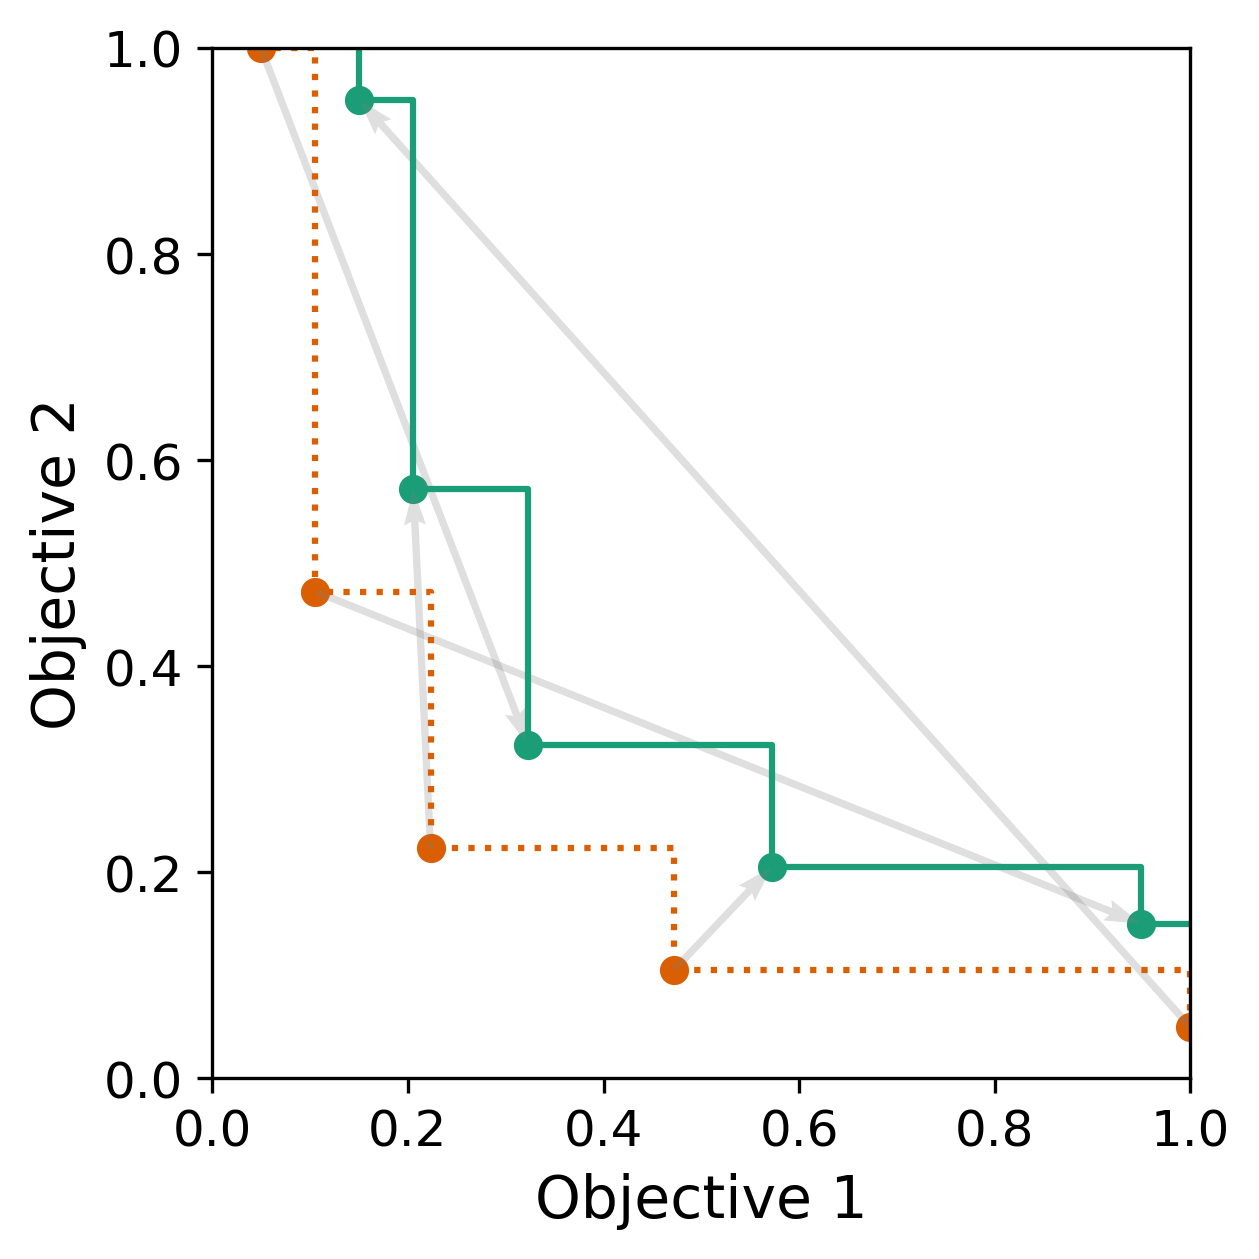

In [7]:
#test is still a pareto front, but order changes
rng = np.random.RandomState(2)
test_x = x + 0.1
test_y = y + 0.1
idx = np.arange(0, test_x.shape[0])
rng.shuffle(idx)
test_x = test_x[idx]
test_y = test_y[idx]
test_x = limx(test_x, 0.05, 0.95)
test_y = limx(test_y, 0.05, 0.95)

fig, ffig = setup_figure(ox=x, oy=y, nx=test_x, ny=test_y)

plot_pareto(fig, test_x, test_y, color=paretocolor, label="test pareto front")
unify_figure(fig, ffig)
#tikzplotlib.save("4_order_change.tex")
ffig.savefig("figures/4_order_change.pdf")